In [1]:
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import spacy
from collections import Counter
from wordcloud import WordCloud

In [2]:
API_KEY = "4ce91b386876467e8cd91ea7c2bc2b12"

def fetch_news(api_key, query="quantum", language="en", page_size=10):
    url = f"https://newsapi.org/v2/everything?q={query}&language={language}&pageSize={page_size}&apiKey={api_key}"
    response = requests.get(url)
    data = response.json()
    with open("articles.json", "w") as f:
        json.dump(data, f, indent=2)
    return data["articles"]

articles = fetch_news(API_KEY)

In [3]:
def extract_contents(articles):
    return [a["content"] or "" for a in articles if a["content"]] # Get non-empty article content

contents = extract_contents(articles)
df = pd.DataFrame(articles)[["title", "source", "url"]]
df

,title,source,url
0,Physicists Solve a 50-Year Mystery About a Cri...,"{'id': None, 'name': 'Gizmodo.com'}",https://gizmodo.com/physicists-solve-a-50-year...
1,Amazon’s Fire TV Omni QLED Series is back down...,"{'id': 'the-verge', 'name': 'The Verge'}",https://www.theverge.com/tech/712612/amazon-fi...
2,A New Era for WIRED—That Starts With You,"{'id': 'wired', 'name': 'Wired'}",https://www.wired.com/story/a-new-era-for-wire...
3,Zacks Investment Ideas feature highlights: Qua...,"{'id': None, 'name': 'Yahoo Entertainment'}",https://finance.yahoo.com/news/zacks-investmen...
4,Denmark taps Microsoft to build world’s most p...,"{'id': 'the-next-web', 'name': 'The Next Web'}",https://thenextweb.com/news/denmark-taps-micro...
5,India eyes global quantum computer push — and ...,"{'id': None, 'name': 'Yahoo Entertainment'}",https://finance.yahoo.com/news/india-eyes-glob...
6,"Quantum computing is so fire — No, seriously. ...","{'id': None, 'name': 'Yahoo Entertainment'}",https://finance.yahoo.com/news/quantum-computi...
7,7 Best Prime Day TV Deals for All Budgets (2025),"{'id': 'wired', 'name': 'Wired'}",https://www.wired.com/story/prime-day-tv-deals...
8,Quasi-Quantifying Qubits for 100 Quid,"{'id': None, 'name': 'Hackaday'}",https://hackaday.com/2025/07/14/quasi-quantify...
9,Quantum Entanglement in Your Brain Is What Gen...,"{'id': None, 'name': 'Popular Mechanics'}",https://www.popularmechanics.com/science/a6536...


In [4]:
nlp = spacy.load("en_core_web_sm")

def extract_entities(contents):
    entity_counter = Counter()
    for text in contents:
        doc = nlp(text)
        for ent in doc.ents:
            if ent.label_ in ["PERSON", "ORG", "GPE"]:
                entity_counter[ent.text.strip()] += 1
    return entity_counter.most_common(20)

top_entities = extract_entities(contents)
top_entities

[('AI', 2),
 ('US', 1),
 ('Chicago', 1),
 ('IL', 1),
 ('Zacks Investment Ideas', 1),
 ('Quantum Computing Inc.', 1),
 ('QUBT', 1),
 ('Denmark', 1),
 ('EIFO', 1),
 ('Denmarks', 1),
 ('QpiAI', 1),
 ('Bank of America', 1),
 ('Spectrometer', 1),
 ('Hearst Magazines', 1),
 ('Yahoo', 1),
 ('Heres', 1)]

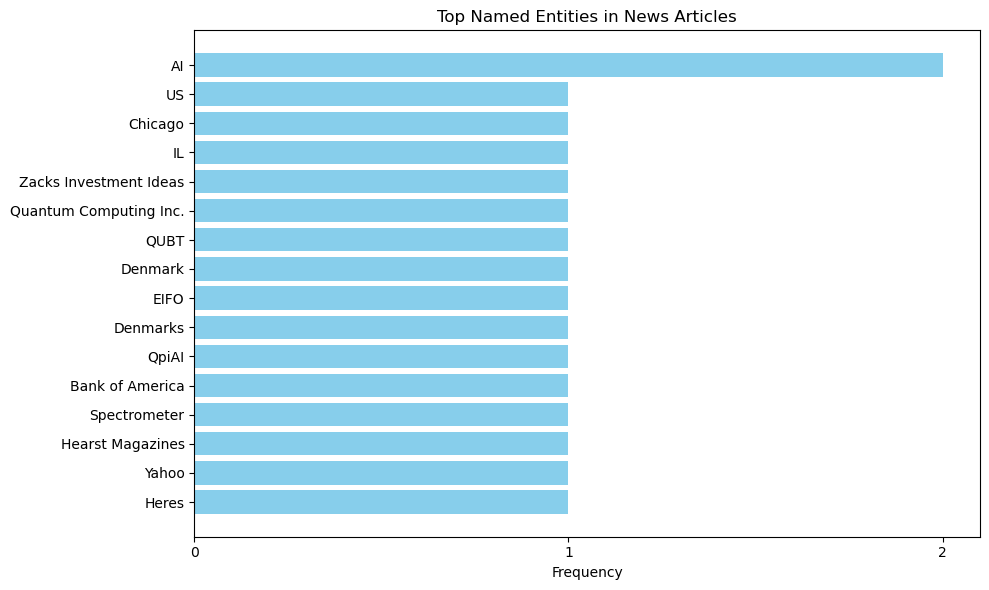

In [5]:
import matplotlib.pyplot as plt

def plot_entities(entities):
    labels, values = zip(*entities)
    plt.figure(1,figsize=(10, 6))
    plt.barh(labels, values, color="skyblue")
    plt.xlabel("Frequency")
    plt.title("Top Named Entities in News Articles")
    plt.gca().invert_yaxis()
    plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
    plt.tight_layout()
    plt.show()

plot_entities(top_entities)

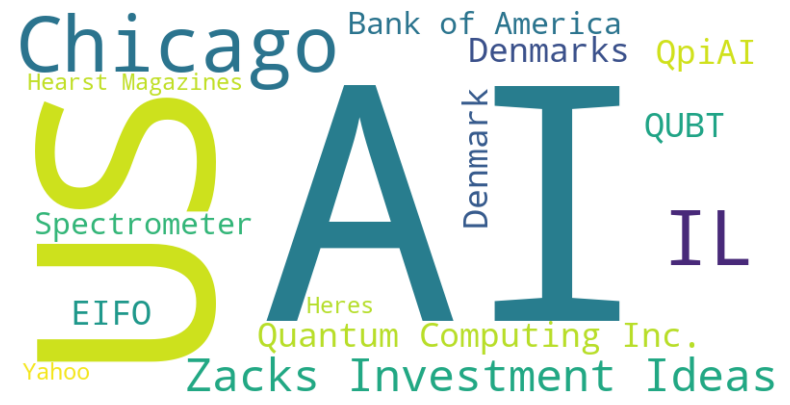

In [6]:
def generate_wordcloud(entities):
    wc = WordCloud(width=800, height=400, background_color='white')
    wc.generate_from_frequencies(dict(entities))
    plt.figure(figsize=(10, 5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.show()

generate_wordcloud(top_entities)